In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow.keras.utils as utils
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Flatten, Input, concatenate, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import GlobalAveragePooling2D

from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score

import cv2
import zipfile
import shutil
import os
import glob

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

from tensorflow.keras.applications import Xception, ResNet50
from tensorflow.keras.applications import InceptionV3, MobileNet

# 1. Cats and Dogs CNN Project

In [ ]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [3]:
with zipfile.ZipFile("content/cats_and_dogs_filtered.zip") as target_file:
    target_file.extractall("content/")

In [8]:
##### 데이터 갯수 확인

cats_train_list = os.listdir("content/cats_and_dogs_filtered/train/cats")
dogs_train_list = os.listdir("content/cats_and_dogs_filtered/train/dogs")

cats_val_list = os.listdir("content/cats_and_dogs_filtered/validation/cats")
dogs_val_list = os.listdir("content/cats_and_dogs_filtered/validation/dogs")

print(len(cats_train_list), len(dogs_train_list))
print(len(cats_val_list), len(dogs_val_list))

1000 1000
500 500


### train디렉토리에서 X_train, y_train 생성

In [24]:
image_list = []
label_list = []


train_base_dir = "/content/cats_and_dogs_filtered/train"
train_label_list = os.listdir(train_base_dir)

start_time = datetime.now()

for train_label_name in train_label_list:
    if train_label_name == "cats":
        label_num = 0.0
    else:
        label_num = 1.0
    
    file_path = os.path.join(train_base_dir, train_label_name)
    img_file_list = glob.glob(file_path + "/*.jpg")
    
    for img_file in img_file_list:
        src_img = cv2.imread(img_file, cv2.IMREAD_COLOR)
        src_img = cv2.resize(src_img, dsize=(224, 224))
        src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
        
        image_list.append(src_img)
        label_list.append(label_num)

end_time = datetime.now()
print("\n걸린시간 : ", end_time - start_time)


걸린시간 :  0:00:00


In [34]:
X_train = np.array(image_list).astype("float32")
y_train = np.array(label_list).astype("float32")

In [35]:
print(X_train.shape, y_train.shape)

(0,) (0,)


In [36]:
# ### 1) 진성&도현 버전

# #label_name_list = os.listdir(DATA_ROOT_DIR)
# DATA_ROOT_DIR = 'content/cats_and_dogs_filtered'

# TRAIN_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'train')
# VAL_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'validation')

# label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)
# label_name_list

# IMG_WIDTH = 224
# IMG_HEIGHT = 224

# train_image_list = []
# train_label_list = []

# class_dict = {"cats" : 0, "dogs" : 1}

# start_time = datetime.now()

# for label_name in label_name_list:
#     file_path = os.path.join(TRAIN_DATA_ROOT_DIR, label_name)
#     img_file_list = glob.glob(file_path + '/*.jpg')
    
#     for img_file in img_file_list:
#         src_img = cv2.imread(img_file, cv2.IMREAD_COLOR)
#         src_img = cv2.resize(src_img, dsize=(IMG_WIDTH, IMG_HEIGHT))
#         src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)

#         train_image_list.append(src_img)
#         #train_label_list.append(class_dict.get(label_name)) # 파일 이미지 이름 변경 필요. P:1 N:0
#         train_label_list.append(float(class_dict[label_name]))

# end_time = datetime.now()

# print(f'걸린시간 :{end_time - start_time}')


# # for train_image in train_image_list:
    
# X_train = np.array(train_image_list).astype('float32')
# y_train = np.array(train_label_list).astype('float32')

# X_train = X_train / 255
# y_train = y_train / 255

# print(X_train.shape, y_train.shape)

걸린시간 :0:00:03.009029
(2000, 224, 224, 3) (2000,)


### validation디렉토리에서 X_val, y_val 생성

In [19]:
image_list = []
label_list = []


val_base_dir = "/content/cats_and_dogs_filtered/validation"
val_label_list = os.listdir(train_base_dir)

start_time = datetime.now()

for val_label_name in val_label_list:
    if val_label_name == "cats":
        label_num = 0.0
    else:
        label_num = 1.0
    
    file_path = os.path.join(val_base_dir, val_label_name)
    img_file_list = glob.glob(file_path + "/*.jpg")
    
    for img_file in img_file_list:
        src_img = cv2.imread(img_file, cv2.IMREAD_COLOR)
        src_img = cv2.resize(src_img, dsize=(224, 224))
        src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
        
        image_list.append(src_img)
        label_list.append(label_num)

end_time = datetime.now()
print("\n걸린시간 : ", end_time - start_time)

500 500


In [ ]:
X_val = np.array(image_list).astype("float32")
y_val = np.array(label_list).astype("float32")

In [ ]:
print(X_val.shape, y_val.shape)

In [39]:
# ### 2) 진성&도현 버전

# import random

# val_image_list = []
# val_label_list = []

# # total_image_list = []
# # total_label_list = []

# class_dict = {"cats" : 0, "dogs" : 1}

# start_time = datetime.now()

# for label_name in label_name_list:
#     file_path = os.path.join(VAL_DATA_ROOT_DIR, label_name)
#     img_file_list = glob.glob(file_path + '/*.jpg')
    
#     #print('img_file_list:', len(img_file_list))
    
#     #random.shuffle(img_file_list) # 섞어주기
    
#     for img_file in img_file_list:
#         src_img = cv2.imread(img_file, cv2.IMREAD_COLOR)
#         src_img = cv2.resize(src_img, dsize=(IMG_WIDTH, IMG_HEIGHT))
#         src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)

#         val_image_list.append(src_img)
# #         total_image_list.append(src_img)
#         #train_label_list.append(class_dict.get(label_name)) # 파일 이미지 이름 변경 필요. P:1 N:0
#         val_label_list.append(float(class_dict[label_name]))
# #         total_label_list.append(float(class_dict[label_name]))

# end_time = datetime.now()

# print(f'걸린시간 :{end_time - start_time}')
# print(len(val_image_list), len(val_label_list))

# # 정의 정규화

# X_val = np.array(val_image_list).astype('float32')
# y_val = np.array(val_label_list).astype('float32')

# X_val = X_val / 255
# y_val = y_val / 255

# print(X_val.shape, y_val.shape)

# # print(X_val.shape)
# # X_val_final = X_val[:500]
# # y_val_final = y_val[:500]

# # print(X_val_final.shape, y_val_final.shape)

걸린시간 :0:00:01.500824
1000 1000
(1000, 224, 224, 3) (1000,)


### validation으로부터 test data 분리(분리 비율은 5:5)

In [40]:
s = np.arange(len(X_val))
np.random.shuffle(s)

X_val = X_val[s]
y_val = y_val[s]

split_num = int(0.5 * len(X_val))

X_test = X_val[0:split_num]
y_test = y_val[0:split_num]

X_val = X_val[split_num:]
y_val = y_val[split_num:]

In [41]:
print(X_val.shape, X_test.shape)
print(y_val.shape, y_test.shape)

(500, 224, 224, 3) (500, 224, 224, 3)
(500,) (500,)


### 이미지 데이터 정규화

In [ ]:
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

### CNN 모델 구축

- C C P(32) C C P(64) C P(128) C P(128) C P(256) F DD

In [44]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', padding='SAME', 
                 input_shape=(224,224,3))) 
model.add(Conv2D(32, (3,3), activation='relu', padding='SAME'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu', padding='SAME'))
model.add(Conv2D(64, (3,3), activation='relu', padding='SAME'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu', padding='SAME'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu', padding='SAME'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3,3), activation='relu', padding='SAME'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(GlobalAveragePooling2D())

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [45]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(), metrics=['acc'])

In [ ]:
start_time = datetime.now()

result = model.fit(X_train, y_train,
                 epochs=30, batch_size=16, 
                 validation_data=(X_val, y_val))

end_time = datetime.now()

In [ ]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)

plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정

plt.subplot(1,2,2)

plt.title("ACC")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["acc"], label="train_acc")
plt.plot(result.history["val_acc"], label="validation_acc")
plt.legend(loc="best")

In [ ]:
model.evaluate(X_test, y_test)

# 2. 전이 학습의 개요
- ImageNet 처럼 아주 큰 데이터셋을 사용하여 사전 학습 모델(pre-trained model)의 가중치를 가져와 우리가 분석하려는 데이터에 맞게 보정해서 사용하는 것을 의미

- 사전 학습 모델은 특징 추출기와 분류기로 이루어져 있다
- 파인 튜닝(fine(미세) tuning)

- InceptionV3(알파고 학습시킨 모델)
- ResNet
- Xception
- MobileNet(넷중에 가장 빠르고 성능이 좋음)

- pip install tensorflowhub

- colab에서 돌린 MobileNet

In [46]:
from tensorflow.keras.applications import Xception, ResNet50
from tensorflow.keras.applications import InceptionV3, MobileNet

In [ ]:
with zipfile.ZipFile("/content/cats_and_dogs_filtered.zip", "r") as target_file:
    target_file.extractall("/content/")

In [ ]:
##### 데이터 갯수 확인

cats_train_list = os.listdir("/content/cats_and_dogs_filtered/train/cats")
dogs_train_list = os.listdir("/content/cats_and_dogs_filtered/train/dogs")

cats_val_list = os.listdir("/content/cats_and_dogs_filtered/validation/cats")
dogs_val_list = os.listdir("/content/cats_and_dogs_filtered/validation/dogs")

print(len(cats_train_list), len(dogs_train_list))
print(len(cats_val_list), len(dogs_val_list))

In [ ]:
image_list = []
label_list = []


train_base_dir = "/content/cats_and_dogs_filtered/train"
train_label_list = os.listdir(train_base_dir)

start_time = datetime.now()

for train_label_name in train_label_list:
    if train_label_name == "cats":
        label_num = 0.0
    else:
        label_num = 1.0
    
    file_path = os.path.join(train_base_dir, train_label_name)
    img_file_list = glob.glob(file_path + "/*.jpg")
    
    for img_file in img_file_list:
        src_img = cv2.imread(img_file, cv2.IMREAD_COLOR)
        src_img = cv2.resize(src_img, dsize=(224, 224))
        src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
        
        image_list.append(src_img)
        label_list.append(label_num)

end_time = datetime.now()
print("\n걸린시간 : ", end_time - start_time)

In [ ]:
X_train = np.array(image_list).astype("float32")
y_train = np.array(label_list).astype("float32")
print(X_train.shape, y_train.shape)

In [ ]:
image_list = []
label_list = []


val_base_dir = "/content/cats_and_dogs_filtered/validation"
val_label_list = os.listdir(train_base_dir)

start_time = datetime.now()

for val_label_name in val_label_list:
    if val_label_name == "cats":
        label_num = 0.0
    else:
        label_num = 1.0
    
    file_path = os.path.join(val_base_dir, val_label_name)
    img_file_list = glob.glob(file_path + "/*.jpg")
    
    for img_file in img_file_list:
        src_img = cv2.imread(img_file, cv2.IMREAD_COLOR)
        src_img = cv2.resize(src_img, dsize=(224, 224))
        src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
        
        image_list.append(src_img)
        label_list.append(label_num)

end_time = datetime.now()
print("\n걸린시간 : ", end_time - start_time)

In [ ]:
X_val = np.array(image_list).astype("float32")
y_val = np.array(label_list).astype("float32")

In [ ]:
print(X_val.shape, y_val.shape)

In [ ]:
s = np.arange(len(X_val))
np.random.shuffle(s)

X_val = X_val[s]
y_val = y_val[s]

split_num = int(0.5 * len(X_val))

X_test = X_val[0:split_num]
y_test = y_val[0:split_num]

X_val = X_val[split_num:]
y_val = y_val[split_num:]

In [ ]:
print(X_val.shape, X_test.shape)
print(y_val.shape, y_test.shape)

In [ ]:
# 정규화
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [ ]:
# MobileNet(Sequential 대신)
base_model = MobileNet(weights="imagenet", include_top=True, input_shape=(224, 224, 3))
base_model.summary()

In [ ]:
base_model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(), metrics=['acc'])

In [ ]:
start_time = datetime.now()

result = base_model.fit(X_train, y_train,
                 epochs=30, batch_size=16, 
                 validation_data=(X_val, y_val))

end_time = datetime.now()
print("\n걸린시간 : ", end_time - start_time)

In [ ]:
base_model.evaluate(X_test, y_test)

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정

plt.subplot(1,2,2)

plt.title("ACC")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["acc"], label="train_acc")
plt.plot(result.history["val_acc"], label="validation_acc")
plt.legend(loc="best") 

## (1) InceptionV3

In [ ]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
    
with zipfile.ZipFile("/content/cats_and_dogs_filtered.zip", "r") as target_file:
    target_file.extractall("/content/")

##### 데이터 갯수 확인

cats_train_list = os.listdir("/content/cats_and_dogs_filtered/train/cats")
dogs_train_list = os.listdir("/content/cats_and_dogs_filtered/train/dogs")

cats_val_list = os.listdir("/content/cats_and_dogs_filtered/validation/cats")
dogs_val_list = os.listdir("/content/cats_and_dogs_filtered/validation/dogs")

print(len(cats_train_list), len(dogs_train_list))
print(len(cats_val_list), len(dogs_val_list))

image_list = []
label_list = []


train_base_dir = "/content/cats_and_dogs_filtered/train"
train_label_list = os.listdir(train_base_dir)

start_time = datetime.now()

for train_label_name in train_label_list:
    if train_label_name == "cats":
        label_num = 0.0
    else:
        label_num = 1.0
    
    file_path = os.path.join(train_base_dir, train_label_name)
    img_file_list = glob.glob(file_path + "/*.jpg")
    
    for img_file in img_file_list:
        src_img = cv2.imread(img_file, cv2.IMREAD_COLOR)
        src_img = cv2.resize(src_img, dsize=(224, 224))
        src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
        
        image_list.append(src_img)
        label_list.append(label_num)

end_time = datetime.now()
print("\n걸린시간 : ", end_time - start_time)

X_train = np.array(image_list).astype("float32")
y_train = np.array(label_list).astype("float32")
print(X_train.shape, y_train.shape)

image_list = []
label_list = []


val_base_dir = "/content/cats_and_dogs_filtered/validation"
val_label_list = os.listdir(train_base_dir)

start_time = datetime.now()

for val_label_name in val_label_list:
    if val_label_name == "cats":
        label_num = 0.0
    else:
        label_num = 1.0
    
    file_path = os.path.join(val_base_dir, val_label_name)
    img_file_list = glob.glob(file_path + "/*.jpg")
    
    for img_file in img_file_list:
        src_img = cv2.imread(img_file, cv2.IMREAD_COLOR)
        src_img = cv2.resize(src_img, dsize=(224, 224))
        src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
        
        image_list.append(src_img)
        label_list.append(label_num)

end_time = datetime.now()
print("\n걸린시간 : ", end_time - start_time)

X_val = np.array(image_list).astype("float32")
y_val = np.array(label_list).astype("float32")

print(X_val.shape, y_val.shape)

s = np.arange(len(X_val))
np.random.shuffle(s)

X_val = X_val[s]
y_val = y_val[s]

split_num = int(0.5 * len(X_val))

X_test = X_val[0:split_num]
y_test = y_val[0:split_num]

X_val = X_val[split_num:]
y_val = y_val[split_num:]


print(X_val.shape, X_test.shape)
print(y_val.shape, y_test.shape)

# 정규화
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# InceptionV3
base_model = InceptionV3(weights="imagenet", include_top=True, input_shape=(224, 224, 3))
base_model.summary()

base_model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(), metrics=['acc'])

start_time = datetime.now()

result = base_model.fit(X_train, y_train,
                 epochs=30, batch_size=16, 
                 validation_data=(X_val, y_val))

end_time = datetime.now()
print("\n걸린시간 : ", end_time - start_time)

base_model.evaluate(X_test, y_test)

## (2) ResNet

- 나머지 코드는 맨 위쪽에 자세히 구분되어 있으니 참고

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50

# ResNet50
base_model = ResNet50(weights="imagenet", include_top=True, input_shape=(224, 224, 3))
base_model.summary()

base_model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(), metrics=['acc'])

start_time = datetime.now()

result = base_model.fit(X_train, y_train,
                 epochs=30, batch_size=16, 
                 validation_data=(X_val, y_val))

end_time = datetime.now()
print("\n걸린시간 : ", end_time - start_time)

base_model.evaluate(X_test, y_test)

# 3. Fine Tunning

- include top = False
- include top을 할 것인지 말 것인지

- 미세 조정은 사전 학습된 모델의 가중치를 새로운 데이터에 맞게 조정하는 방법. 사전 학습된 모델의 성능을 새로운 작업에 적용할 수 있습니다.

> include top=False 
- 사전 학습된 모델의 최상위 계층을 제외하고 모든 계층을 미세 조정합니다.
- 사전 학습된 모델의 특성 추출 기능을 유지하면서 새로운 작업에 맞게 모델을 조정할 수 있습니다.

> include top=True 
- 사전 학습된 모델의 모든 계층을 미세 조정합니다.
- 사전 학습된 모델의 특성 추출 기능과 분류 기능을 모두 조정할 수 있습니다.

  
- 예를 들어, 사전 학습된 모델이 이미지 분류에 사용되었다면 include top=False 옵션을 사용하면 모델의 특성 추출 기능을 유지하면서 새로운 이미지 분류 작업에 맞게 모델을 조정할 수 있습니다.
- 반면에 include top=True 옵션을 사용하면 모델의 특성 추출 기능과 분류 기능을 모두 조정할 수 있습니다.  
  
  
- 이 두 가지 중 어떤 옵션을 선택할지는 새로운 작업의 특성에 따라 다릅니다.
- 만약 새로운 작업이 사전 학습된 모델과 매우 유사하다면 include top=False 옵션을 선택하는 것이 좋습니다.
- 반면에 새로운 작업이 사전 학습된 모델과 매우 다르다면 include top=True 옵션을 선택하는 것이 좋습니다.

## (1) include top = True

In [13]:
# !wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
    
# with zipfile.ZipFile("/content/cats_and_dogs_filtered.zip", "r") as target_file:
#     target_file.extractall("/content/")

##### 데이터 갯수 확인

cats_train_list = os.listdir("content/cats_and_dogs_filtered/train/cats")
dogs_train_list = os.listdir("content/cats_and_dogs_filtered/train/dogs")

cats_val_list = os.listdir("content/cats_and_dogs_filtered/validation/cats")
dogs_val_list = os.listdir("content/cats_and_dogs_filtered/validation/dogs")

print(len(cats_train_list), len(dogs_train_list))
print(len(cats_val_list), len(dogs_val_list))

image_list = []
label_list = []

IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

train_base_dir = "content/cats_and_dogs_filtered/train"
train_label_list = os.listdir(train_base_dir)

start_time = datetime.now()

for train_label_name in train_label_list:
    if train_label_name == "cats":
        label_num = 0.0
    else:
        label_num = 1.0
    
    file_path = os.path.join(train_base_dir, train_label_name)
    img_file_list = glob.glob(file_path + "/*.jpg")
    
    for img_file in img_file_list:
        src_img = cv2.imread(img_file, cv2.IMREAD_COLOR)
        src_img = cv2.resize(src_img, dsize=(IMAGE_HEIGHT,IMAGE_WIDTH))
        src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
        
        image_list.append(src_img)
        label_list.append(label_num)

end_time = datetime.now()
print("\n걸린시간 : ", end_time - start_time)

X_train = np.array(image_list).astype("float32")
y_train = np.array(label_list).astype("float32")
print(X_train.shape, y_train.shape)

image_list = []
label_list = []



val_base_dir = "content/cats_and_dogs_filtered/validation"
val_label_list = os.listdir(train_base_dir)

start_time = datetime.now()

for val_label_name in val_label_list:
    if val_label_name == "cats":
        label_num = 0.0
    else:
        label_num = 1.0
    
    file_path = os.path.join(val_base_dir, val_label_name)
    img_file_list = glob.glob(file_path + "/*.jpg")
    
    for img_file in img_file_list:
        src_img = cv2.imread(img_file, cv2.IMREAD_COLOR)
        src_img = cv2.resize(src_img, dsize=(IMAGE_HEIGHT,IMAGE_WIDTH))
        src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
        
        image_list.append(src_img)
        label_list.append(label_num)

end_time = datetime.now()
print("\n걸린시간 : ", end_time - start_time)

X_val = np.array(image_list).astype("float32")
y_val = np.array(label_list).astype("float32")

print(X_val.shape, y_val.shape)

s = np.arange(len(X_val))
np.random.shuffle(s)

X_val = X_val[s]
y_val = y_val[s]

split_num = int(0.5 * len(X_val))

X_test = X_val[0:split_num]
y_test = y_val[0:split_num]

X_val = X_val[split_num:]
y_val = y_val[split_num:]


print(X_val.shape, X_test.shape)
print(y_val.shape, y_test.shape)

# 정규화
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# InceptionV3
base_model = MobileNet(weights="imagenet", include_top=True, input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH, 3))
base_model.summary()

base_model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4), metrics=['acc'])


start_time = datetime.now()

result = base_model.fit(X_train, y_train,
                 epochs=3, batch_size=16, 
                 validation_data=(X_val, y_val))

end_time = datetime.now()
print("\n걸린시간 : ", end_time - start_time)

base_model.evaluate(X_test, y_test)

1000 1000
500 500

걸린시간 :  0:00:06.207787
(2000, 224, 224, 3) (2000,)

걸린시간 :  0:00:02.752105
(1000, 224, 224, 3) (1000,)
(500, 224, 224, 3) (500, 224, 224, 3)
(500,) (500,)
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
      

                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9

[0.13003647327423096, 0.9739999771118164]

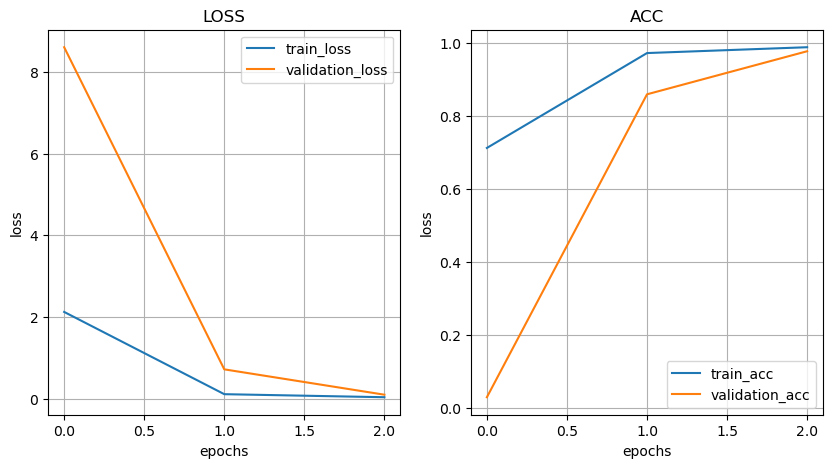

In [14]:
# include_top = True
# MobileNet
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정

plt.subplot(1,2,2)

plt.title("ACC")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["acc"], label="train_acc")
plt.plot(result.history["val_acc"], label="validation_acc")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정

## (2) include top = False

- include top = False
- base_model로 바꾼 곳들을 다시 model로 변경 필수
- 다중분류

In [10]:
# !wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
    
# with zipfile.ZipFile("/content/cats_and_dogs_filtered.zip", "r") as target_file:
#     target_file.extractall("/content/")

##### 데이터 갯수 확인

cats_train_list = os.listdir("content/cats_and_dogs_filtered/train/cats")
dogs_train_list = os.listdir("content/cats_and_dogs_filtered/train/dogs")

cats_val_list = os.listdir("content/cats_and_dogs_filtered/validation/cats")
dogs_val_list = os.listdir("content/cats_and_dogs_filtered/validation/dogs")

print(len(cats_train_list), len(dogs_train_list))
print(len(cats_val_list), len(dogs_val_list))

image_list = []
label_list = []

IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

train_base_dir = "content/cats_and_dogs_filtered/train"
train_label_list = os.listdir(train_base_dir)

start_time = datetime.now()

for train_label_name in train_label_list:
    if train_label_name == "cats":
        label_num = 0.0
    else:
        label_num = 1.0
    
    file_path = os.path.join(train_base_dir, train_label_name)
    img_file_list = glob.glob(file_path + "/*.jpg")
    
    for img_file in img_file_list:
        src_img = cv2.imread(img_file, cv2.IMREAD_COLOR)
        src_img = cv2.resize(src_img, dsize=(IMAGE_HEIGHT,IMAGE_WIDTH))
        src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
        
        image_list.append(src_img)
        label_list.append(label_num)

end_time = datetime.now()
print("\n걸린시간 : ", end_time - start_time)

X_train = np.array(image_list).astype("float32")
y_train = np.array(label_list).astype("float32")
print(X_train.shape, y_train.shape)

image_list = []
label_list = []



val_base_dir = "content/cats_and_dogs_filtered/validation"
val_label_list = os.listdir(train_base_dir)

start_time = datetime.now()

for val_label_name in val_label_list:
    if val_label_name == "cats":
        label_num = 0.0
    else:
        label_num = 1.0
    
    file_path = os.path.join(val_base_dir, val_label_name)
    img_file_list = glob.glob(file_path + "/*.jpg")
    
    for img_file in img_file_list:
        src_img = cv2.imread(img_file, cv2.IMREAD_COLOR)
        src_img = cv2.resize(src_img, dsize=(IMAGE_HEIGHT,IMAGE_WIDTH))
        src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
        
        image_list.append(src_img)
        label_list.append(label_num)

end_time = datetime.now()
print("\n걸린시간 : ", end_time - start_time)

X_val = np.array(image_list).astype("float32")
y_val = np.array(label_list).astype("float32")

print(X_val.shape, y_val.shape)

s = np.arange(len(X_val))
np.random.shuffle(s)

X_val = X_val[s]
y_val = y_val[s]

split_num = int(0.5 * len(X_val))

X_test = X_val[0:split_num]
y_test = y_val[0:split_num]

X_val = X_val[split_num:]
y_val = y_val[split_num:]


print(X_val.shape, X_test.shape)
print(y_val.shape, y_test.shape)

# 정규화
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0


base_model = MobileNet(weights="imagenet", include_top=False, input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH, 3))

# include_top = False
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(2, activation="softmax"))

model.summary()

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4), metrics=['acc'])


start_time = datetime.now()

result = model.fit(X_train, y_train,
                 epochs=3, batch_size=16, 
                 validation_data=(X_val, y_val))

end_time = datetime.now()
print("\n걸린시간 : ", end_time - start_time)

model.evaluate(X_test, y_test)

1000 1000
500 500

걸린시간 :  0:00:09.416573
(2000, 224, 224, 3) (2000,)

걸린시간 :  0:00:09.899628
(1000, 224, 224, 3) (1000,)
(500, 224, 224, 3) (500, 224, 224, 3)
(500,) (500,)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 50176)             0         
                                                                 
 dense_3 (Dense)             (None, 16)                802832    
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 2)                 34        
            

[0.044624269008636475, 0.9860000014305115]

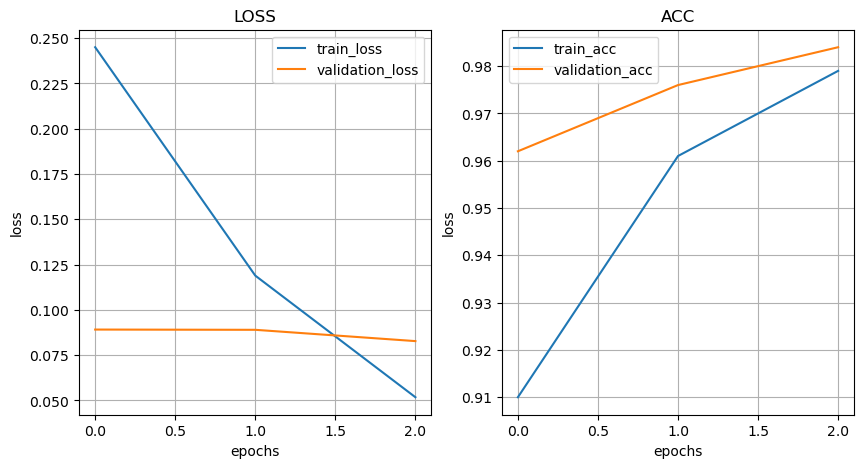

In [12]:
# include_top = True
# MobileNet
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정

plt.subplot(1,2,2)

plt.title("ACC")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["acc"], label="train_acc")
plt.plot(result.history["val_acc"], label="validation_acc")
plt.legend(loc="best") # 이름이 있어야 범례를 표시할 수 있음. # label로 이름 지정

## 테스트 이미지 확인

- 텐서플로우를 사용 못하는 환경에서는 cv2를 사용하자

In [29]:
# !wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
    
# with zipfile.ZipFile("/content/cats_and_dogs_filtered.zip", "r") as target_file:
#     target_file.extractall("/content/")

##### 이진분류

##### 데이터 갯수 확인


cats_train_list = os.listdir("content/cats_and_dogs_filtered/train/cats")
dogs_train_list = os.listdir("content/cats_and_dogs_filtered/train/dogs")

cats_val_list = os.listdir("content/cats_and_dogs_filtered/validation/cats")
dogs_val_list = os.listdir("content/cats_and_dogs_filtered/validation/dogs")

print(len(cats_train_list), len(dogs_train_list))
print(len(cats_val_list), len(dogs_val_list))

image_list = []
label_list = []

IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

train_base_dir = "content/cats_and_dogs_filtered/train"
train_label_list = os.listdir(train_base_dir)

start_time = datetime.now()

for train_label_name in train_label_list:
    if train_label_name == "cats":
        label_num = 0.0
    else:
        label_num = 1.0
    
    file_path = os.path.join(train_base_dir, train_label_name)
    img_file_list = glob.glob(file_path + "/*.jpg")
    
    for img_file in img_file_list:
        src_img = cv2.imread(img_file, cv2.IMREAD_COLOR)
        src_img = cv2.resize(src_img, dsize=(IMAGE_HEIGHT,IMAGE_WIDTH))
        src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
        
        image_list.append(src_img)
        label_list.append(label_num)

end_time = datetime.now()
print("\n걸린시간 : ", end_time - start_time)

X_train = np.array(image_list).astype("float32")
y_train = np.array(label_list).astype("float32")
print(X_train.shape, y_train.shape)

image_list = []
label_list = []



val_base_dir = "content/cats_and_dogs_filtered/validation"
val_label_list = os.listdir(train_base_dir)

start_time = datetime.now()

for val_label_name in val_label_list:
    if val_label_name == "cats":
        label_num = 0.0
    else:
        label_num = 1.0
    
    file_path = os.path.join(val_base_dir, val_label_name)
    img_file_list = glob.glob(file_path + "/*.jpg")
    
    for img_file in img_file_list:
        src_img = cv2.imread(img_file, cv2.IMREAD_COLOR)
        src_img = cv2.resize(src_img, dsize=(IMAGE_HEIGHT,IMAGE_WIDTH))
        src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
        
        image_list.append(src_img)
        label_list.append(label_num)

end_time = datetime.now()
print("\n걸린시간 : ", end_time - start_time)

X_val = np.array(image_list).astype("float32")
y_val = np.array(label_list).astype("float32")

print(X_val.shape, y_val.shape)

s = np.arange(len(X_val))
np.random.shuffle(s)

X_val = X_val[s]
y_val = y_val[s]

split_num = int(0.5 * len(X_val))

X_test = X_val[0:split_num]
y_test = y_val[0:split_num]

X_val = X_val[split_num:]
y_val = y_val[split_num:]


print(X_val.shape, X_test.shape)
print(y_val.shape, y_test.shape)

# 정규화
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# InceptionV3
base_model = MobileNet(weights="imagenet", include_top=False, input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH, 3))

# include_top = False
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(1, activation="sigmoid"))

model.summary()

model.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4), metrics=['acc'])


start_time = datetime.now()

result = model.fit(X_train, y_train,
                 epochs=3, batch_size=16, 
                 validation_data=(X_val, y_val))

end_time = datetime.now()
print("\n걸린시간 : ", end_time - start_time)

model.evaluate(X_test, y_test)

1000 1000
500 500

걸린시간 :  0:00:03.156007
(2000, 224, 224, 3) (2000,)

걸린시간 :  0:00:01.576108
(1000, 224, 224, 3) (1000,)
(500, 224, 224, 3) (500, 224, 224, 3)
(500,) (500,)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 50176)             0         
                                                                 
 dense_5 (Dense)             (None, 16)                802832    
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
            

[0.04948488995432854, 0.9860000014305115]

In [30]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

test_img_list = []

test_img_name_list = glob.glob("data/test_dir/*")

for i in range(len(test_img_name_list)):
    src_img = cv2.imread(test_img_name_list[i], cv2.IMREAD_COLOR)
    src_img = cv2.resize(src_img, dsize=[IMAGE_WIDTH, IMAGE_HEIGHT])
    dst_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
    dst_img = dst_img/255.0
    test_img_list.append(dst_img)
    
print(test_img_list)

[array([[[0.61960784, 0.4627451 , 0.3254902 ],
        [0.61960784, 0.4627451 , 0.3254902 ],
        [0.61960784, 0.4627451 , 0.3254902 ],
        ...,
        [0.55294118, 0.43921569, 0.28235294],
        [0.56078431, 0.43921569, 0.28627451],
        [0.56470588, 0.43921569, 0.28627451]],

       [[0.61568627, 0.45882353, 0.32156863],
        [0.61568627, 0.45882353, 0.32156863],
        [0.61568627, 0.45882353, 0.32156863],
        ...,
        [0.55294118, 0.43529412, 0.28235294],
        [0.56078431, 0.43529412, 0.28235294],
        [0.56470588, 0.43137255, 0.28235294]],

       [[0.61568627, 0.45490196, 0.31764706],
        [0.61568627, 0.45490196, 0.31764706],
        [0.61568627, 0.45490196, 0.31764706],
        ...,
        [0.55294118, 0.43137255, 0.27843137],
        [0.56078431, 0.43137255, 0.27843137],
        [0.56470588, 0.42745098, 0.27843137]],

       ...,

       [[0.80392157, 0.78039216, 0.73333333],
        [0.78431373, 0.76078431, 0.71372549],
        [0.75294118, 

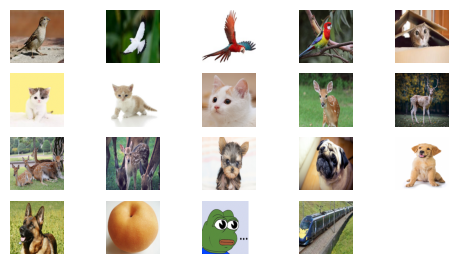

In [31]:
plt.figure(figsize=(6, 4))

for i in range(len(test_img_list)):
    plt.subplot(5, 5, i+1)
    plt.axis("off")
    plt.imshow(test_img_list[i])

In [32]:
test_img_list[0].shape
# (224, 224, 3)
# 현재 3차원

(224, 224, 3)

In [33]:
np.array(test_img_list).shape
# (19, 224, 224, 3)
# 배열로 감싸니 4차원

(19, 224, 224, 3)

In [34]:
pred = model.predict(np.array(test_img_list))

1/1 [==============================] - 0s 420ms/step


In [35]:
print(pred.shape)
print(pred)

(19, 1)
[[9.9999809e-01]
 [4.7508124e-03]
 [1.2991193e-03]
 [9.9992269e-01]
 [1.5848986e-10]
 [6.1736266e-10]
 [2.8979969e-12]
 [4.7779437e-12]
 [9.9994671e-01]
 [9.9998194e-01]
 [9.9867547e-01]
 [9.7538388e-01]
 [1.8992540e-01]
 [9.8188734e-01]
 [1.0000000e+00]
 [9.9999988e-01]
 [4.1035923e-01]
 [4.3003988e-02]
 [9.2759615e-01]]


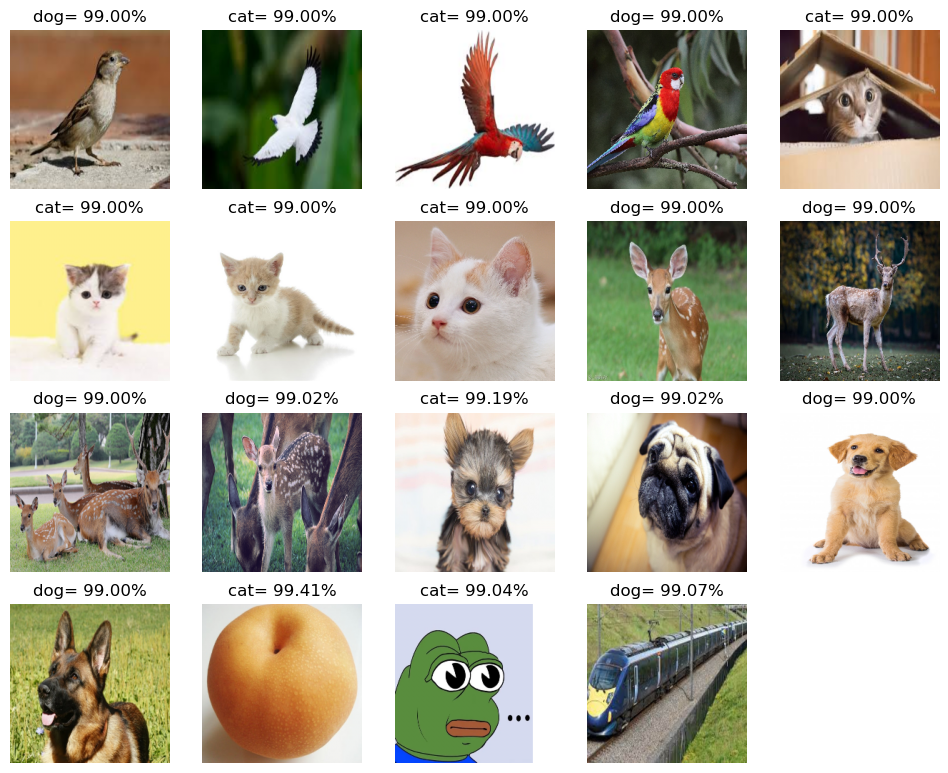

In [38]:
plt.figure(figsize=(12, 12))

for i in range(len(pred)):
    if pred[i] > 0.5:
        prob = pred[i]
        prediction = "dog"
    else:
        prob = 1.0 - pred[i]
        prediction = "cat"
    
    
    plt.subplot(5,5, i+1)
    plt.axis("off")
    
    prob_str = str("{0:0.2f}".format(100-max(prob))) + "%"
    plt.imshow(test_img_list[i])
    plt.title(prediction + "= " + prob_str)

## 2. Categorical

In [42]:
# !wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
    
# with zipfile.ZipFile("/content/cats_and_dogs_filtered.zip", "r") as target_file:
#     target_file.extractall("/content/")

##### 이진분류

##### 데이터 갯수 확인


cats_train_list = os.listdir("content/cats_and_dogs_filtered/train/cats")
dogs_train_list = os.listdir("content/cats_and_dogs_filtered/train/dogs")

cats_val_list = os.listdir("content/cats_and_dogs_filtered/validation/cats")
dogs_val_list = os.listdir("content/cats_and_dogs_filtered/validation/dogs")

print(len(cats_train_list), len(dogs_train_list))
print(len(cats_val_list), len(dogs_val_list))

image_list = []
label_list = []

IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

train_base_dir = "content/cats_and_dogs_filtered/train"
train_label_list = os.listdir(train_base_dir)

start_time = datetime.now()

for train_label_name in train_label_list:
    if train_label_name == "cats":
        label_num = 0.0
    else:
        label_num = 1.0
    
    file_path = os.path.join(train_base_dir, train_label_name)
    img_file_list = glob.glob(file_path + "/*.jpg")
    
    for img_file in img_file_list:
        src_img = cv2.imread(img_file, cv2.IMREAD_COLOR)
        src_img = cv2.resize(src_img, dsize=(IMAGE_HEIGHT,IMAGE_WIDTH))
        src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
        
        image_list.append(src_img)
        label_list.append(label_num)

end_time = datetime.now()
print("\n걸린시간 : ", end_time - start_time)

X_train = np.array(image_list).astype("float32")
y_train = np.array(label_list).astype("float32")
print(X_train.shape, y_train.shape)

image_list = []
label_list = []



val_base_dir = "content/cats_and_dogs_filtered/validation"
val_label_list = os.listdir(train_base_dir)

start_time = datetime.now()

for val_label_name in val_label_list:
    if val_label_name == "cats":
        label_num = 0.0
    else:
        label_num = 1.0
    
    file_path = os.path.join(val_base_dir, val_label_name)
    img_file_list = glob.glob(file_path + "/*.jpg")
    
    for img_file in img_file_list:
        src_img = cv2.imread(img_file, cv2.IMREAD_COLOR)
        src_img = cv2.resize(src_img, dsize=(IMAGE_HEIGHT,IMAGE_WIDTH))
        src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
        
        image_list.append(src_img)
        label_list.append(label_num)

end_time = datetime.now()
print("\n걸린시간 : ", end_time - start_time)

X_val = np.array(image_list).astype("float32")
y_val = np.array(label_list).astype("float32")

print(X_val.shape, y_val.shape)

s = np.arange(len(X_val))
np.random.shuffle(s)

X_val = X_val[s]
y_val = y_val[s]

split_num = int(0.5 * len(X_val))

X_test = X_val[0:split_num]
y_test = y_val[0:split_num]

X_val = X_val[split_num:]
y_val = y_val[split_num:]


print(X_val.shape, X_test.shape)
print(y_val.shape, y_test.shape)

# 정규화
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# InceptionV3
base_model = MobileNet(weights="imagenet", include_top=False, input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH, 3))

# include_top = False
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(2, activation="softmax"))

model.summary()

model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4), metrics=['acc'])


start_time = datetime.now()

result = model.fit(X_train, y_train,
                 epochs=3, batch_size=16, 
                 validation_data=(X_val, y_val))

end_time = datetime.now()
print("\n걸린시간 : ", end_time - start_time)

model.evaluate(X_test, y_test)

1000 1000
500 500

걸린시간 :  0:00:03.001048
(2000, 224, 224, 3) (2000,)

걸린시간 :  0:00:01.543257
(1000, 224, 224, 3) (1000,)
(500, 224, 224, 3) (500, 224, 224, 3)
(500,) (500,)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 50176)             0         
                                                                 
 dense_13 (Dense)            (None, 16)                802832    
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 2)                 34        
            

KeyboardInterrupt: 